<h1>Measures Of Dispersion</h1>

In [27]:
import numpy as np
import matplotlib.pyplot as plt

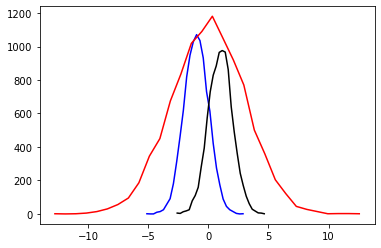

In [28]:
##create some data distributions

N = 10001
nbins = 30

d1 = np.random.randn(N) - 1
d2 = 3 * np.random.randn(N)
d3 = np.random.randn(N) + 1


#need their histograms
y1, x1 = np.histogram(d1, nbins)
x1 = (x1[1:] + x1[:-1])/2

y2, x2 = np.histogram(d2, nbins)
x2 = (x2[1:] + x2[:-1])/2

y3, x3 = np.histogram(d3, nbins)
x3 = (x3[1:] + x3[:-1])/2

#plot them

plt.plot(x1, y1, 'b')
plt.plot(x2, y2, 'r')
plt.plot(x3, y3, 'k')

In [29]:
#side Note

meanval = 10.2
stdval = 7.5
numsamp = 123

#this
np.random.normal(meanval, stdval, numsamp)

# is equivalent to
np.random.randn(numsamp) * stdval + meanval


array([24.21261257, 15.03475078,  5.41408561,  1.97938866,  8.37450178,
       12.7181508 , 10.92530148, 19.26351463,  2.2959434 , -0.14318936,
       15.25391503, 13.89727359, 17.27507966, 20.81266634, 22.93943364,
        9.61724614, 14.93869654,  3.60618744, 12.31937394, 11.93357919,
        1.25047893, 19.69129467, 16.60377538,  4.84094732, -0.51175525,
        7.0537875 ,  1.1366144 , 10.00450383,  4.80231549,  9.32305284,
        2.33403373,  0.73577397, 20.10312647, 20.1615364 ,  8.09297477,
       16.84144631, 11.71158904,  1.52274221, 12.7060863 , 16.55278133,
       22.85784911,  8.21148651,  6.65513706,  6.41508371, 23.38033969,
        6.57429373, 15.16444015,  6.08373653,  4.51726664, 12.94124949,
        9.58472975, 18.29042873, 15.17791012, 12.29559272, 16.77107479,
       12.59624369, 12.16324967, -4.98116091, 14.84667554, 26.26427228,
        5.86057309, 13.48339813, 16.64141096, 11.54259719, 15.78985949,
       11.12069194,  7.69007217, 15.54124546, 11.37474595, -1.75

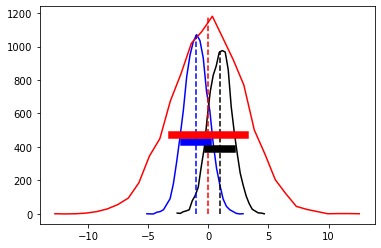

In [33]:
## now let's calculate standard deviation

# initialize

std = np.zeros(3)

mean_d1 = np.mean(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)


std[0] = np.std(d1, ddof = 1)
std[1] = np.std(d2, ddof = 1)
std[2] = np.std(d3, ddof = 1)

#make some plot easier
plt.plot(x1, y1, 'b', x2, y2, 'r', x3, y3, 'k')
plt.plot([mean_d1, mean_d1],[0, max(y1)], 'b--', [mean_d2, mean_d2], [0, max(y2)], 'r--', [mean_d3, mean_d3], [0, max(y3)], 'k--')

#adding the std deviations
plt.plot([mean_d1 - std[0], mean_d1 + std[0]], [.4*max(y1), .4*max(y1)],'b',linewidth = 7.5)
plt.plot([mean_d2 - std[1], mean_d2 + std[1]], [.4*max(y2), .4*max(y2)],'r',linewidth = 7.5)
plt.plot([mean_d3 - std[2], mean_d3 + std[2]], [.4*max(y3), .4*max(y3)],'k',linewidth = 7.5)

plt.show()

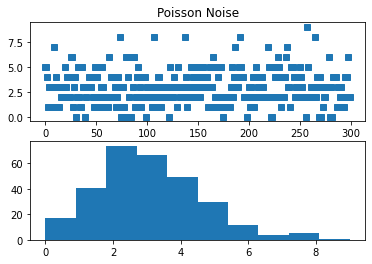

In [34]:
##Fano Factor and Coefficient Of Variation (CV)

#need-positive valued data
data = np.random.poisson(3, 300)

fig, ax = plt.subplots(2, 1)
ax[0].plot(data , 's')
ax[0].set_title('Poisson Noise')

ax[1].hist(data)
plt.show()

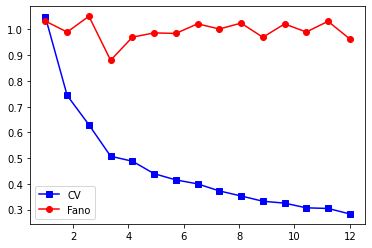

In [38]:
##compute fano factor and CV for range of lambda parameters

#list of parameters
lambdas = np.linspace(1, 12, 15)

#initialize output vectors
fano = np.zeros(len(lambdas))
cv = np.zeros(len(lambdas))

for li in range(len(lambdas)):
    
    #generate new data
    data = np.random.poisson(lambdas[li], 1000)
    
    #compute the metrics
    cv[li] = np.std(data)/np.mean(data)
    fano[li] = np.var(data)/np.mean(data)
    
plt.plot(lambdas,cv,'bs-',label="CV")
plt.plot(lambdas,fano,'ro-',label="Fano")
plt.legend()
plt.show()